Working with 152 images


Training images:  76
Test images:  76
Confusion matrix:
[[15  5]
 [13 42]]

Score:  76.0 %



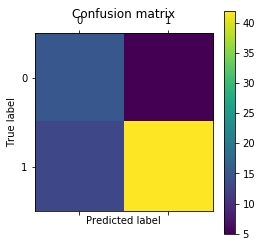

Example
Prediction: [2]
Real class:  2


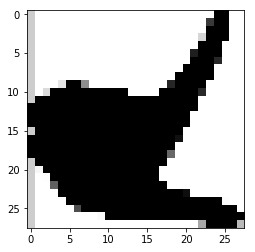

Execution time: 0.214818954468


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from time import time
from sklearn.metrics import confusion_matrix
from os import listdir
from glob import glob
import cv2

"""

FOLDER STRUCTURE

dataset
    |
    |----------1_finger
    |        .   |-------hand_0.png
    |        .   |         .
    |        .   |         .
    |        .   |         .
    |        .   |-------hand_n.png
    |        .
    |----------5_fingers
    
"""
tiempo_inicial = time() 

path = "dataset_28"
resize = True
percentage = 100
numb_label = []

classes = listdir(path)

image_list = []
labels = []
for classe in classes:
    for filename in glob(path+'/'+classe+'/*.png'):
        
        image_list.append(cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2GRAY))
                
        label = np.zeros(len(classes))
        label[classes.index(classe)]=1
        labels.append(label)
        
indice = np.random.permutation(len(image_list))[:int(len(image_list)*percentage/100)]

images = np.array([image_list[x] for x in indice])
labels = np.array([labels[x] for x in indice])
classes = np.array(classes)

#creamos data, imagenes vectorizadas
nsamples, nx, ny = images.shape
data = images.reshape((nsamples,nx*ny))

#numb_label = etiquetas numericas
for i in range (0,len(image_list)):
    numb_label.append(labels[i].argmax())
numb_label=np.array(numb_label)

#ordenamos las etiquetas
for i in range (0,len(image_list)):
    if numb_label[i]==0: numb_label[i]=5
    elif numb_label[i]==1: numb_label[i]=1
    elif numb_label[i]==2: numb_label[i]=4
    elif numb_label[i]==3: numb_label[i]=3
    elif numb_label[i]==4: numb_label[i]=2
    

print "Working with {} images\n".format(len(image_list))

#seleccionamos los parametros del clasificador
clf = neighbors.KNeighborsClassifier()

ratio = len(image_list)*0.5
ratio = int(ratio)
print "\nTraining images: ",ratio
print "Test images: ",len(image_list)-ratio

#creammos las variables de entrenamiento con todos los archivos menos el ultimo
X_train,y_train = data[:ratio], numb_label[:ratio]
X_test,y_test = data[ratio+1:], numb_label[ratio+1:]

#entrenamos el clasificador
y_pred = clf.fit(X_train,y_train).predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print "Confusion matrix:"
print cm

print "\nScore: ",clf.score(X_test,y_test)*100,"%\n"

plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

test=ratio+1

#hacemos la prediccion sobre el ultimo valor
print 'Example'
print 'Prediction:',clf.predict(data[[test]])
print 'Real class: ',numb_label[test]

#mostramos por pantalla
plt.imshow(images[test],cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

tiempo_final = time() 
tiempo_ejecucion = tiempo_final - tiempo_inicial
 
print 'Execution time:',tiempo_ejecucion
cv2.waitKey(0)
cv2.destroyAllWindows()